In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [4]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install
# pip install catboost

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier, Pool

### Область работы 2 (поиск  модели .... )

In [6]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train_diab.csv' # содержит только имя файла, без имен папок !!!

In [9]:
print("1. Загрузка данных...")
df = pd.read_csv('train_diab.csv')
df.head()

1. Загрузка данных...


,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [10]:
print("\n2. Предварительный анализ данных:")
print(f"Размер данных: {df.shape}")
print(f"\nПервые 5 строк:")
print(df.head())
print(f"\nИнформация о типах данных:")
print(df.info())
print(f"\nСтатистика числовых признаков:")
print(df.describe())
print(f"\nПропущенные значения:")
print(df.isnull().sum())


2. Предварительный анализ данных:
Размер данных: (700000, 26)

Первые 5 строк:
   id  age  alcohol_consumption_per_week  physical_activity_minutes_per_week  \
0   0   31                             1                                  45   
1   1   50                             2                                  73   
2   2   32                             3                                 158   
3   3   54                             3                                  77   
4   4   54                             1                                  55   

   diet_score  sleep_hours_per_day  screen_time_hours_per_day   bmi  \
0         7.7                  6.8                        6.1  33.4   
1         5.7                  6.5                        5.8  23.8   
2         8.5                  7.4                        9.1  24.1   
3         4.6                  7.0                        9.2  26.6   
4         5.7                  6.2                        5.1  28.8   

   waist_to_

In [11]:
print(f"\n3. Баланс классов (diagnosed_diabetes):")
print(df['diagnosed_diabetes'].value_counts(normalize=True))


3. Баланс классов (diagnosed_diabetes):
diagnosed_diabetes
1.0    0.623296
0.0    0.376704
Name: proportion, dtype: float64


In [12]:
print("\n4. Подготовка данных...")

# Определяем категориальные признаки
categorical_features = ['gender', 'ethnicity', 'education_level', 'income_level', 
                        'smoking_status', 'employment_status', 'family_history_diabetes',
                        'hypertension_history', 'cardiovascular_history']



4. Подготовка данных...


In [13]:
# Кодируем целевую переменную, если она не в числовом формате
if df['diagnosed_diabetes'].dtype == 'object':
    le = LabelEncoder()
    df['diagnosed_diabetes'] = le.fit_transform(df['diagnosed_diabetes'])

# Разделяем на признаки и целевую переменную
X = df.drop('diagnosed_diabetes', axis=1)
y = df['diagnosed_diabetes']

# Удаляем ID из признаков
if 'id' in X.columns:
    X = X.drop('id', axis=1)

In [15]:
print("\n5. Разделение данных на train/val/test...")
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp
)

print(f"Размер train: {X_train.shape}")
print(f"Размер val: {X_val.shape}")
print(f"Размер test: {X_test.shape}")


5. Разделение данных на train/val/test...
Размер train: (420000, 24)
Размер val: (140000, 24)
Размер test: (140000, 24)


In [16]:
# 6. Определение категориальных признаков для CatBoost
cat_features_indices = [X.columns.get_loc(col) for col in categorical_features if col in X.columns]
print(f"\nКатегориальные признаки: {categorical_features}")
print(f"Индексы категориальных признаков: {cat_features_indices}")


Категориальные признаки: ['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history']
Индексы категориальных признаков: [15, 16, 17, 18, 19, 20, 21, 22, 23]


In [17]:
# 7. Создание и обучение CatBoost модели
print("\n6. Обучение CatBoost модели...")

# Определяем параметры модели
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    l2_leaf_reg=3,
    verbose=100,
    eval_metric='AUC',
    early_stopping_rounds=50,
    cat_features=cat_features_indices,
    class_weights=[1, (y_train.value_counts()[0] / y_train.value_counts()[1])]  # Балансировка классов
)

# Создаем Pool объекты
train_pool = Pool(X_train, y_train, cat_features=cat_features_indices)
val_pool = Pool(X_val, y_val, cat_features=cat_features_indices)

# Обучаем модель
model.fit(
    train_pool,
    eval_set=val_pool,
    plot=True,
    use_best_model=True
)

print("Модель обучена!")


6. Обучение CatBoost модели...


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6748466	best: 0.6748466 (0)	total: 250ms	remaining: 4m 9s
100:	test: 0.7050169	best: 0.7050169 (100)	total: 24.8s	remaining: 3m 40s
200:	test: 0.7106560	best: 0.7106560 (200)	total: 50s	remaining: 3m 18s
300:	test: 0.7158151	best: 0.7158151 (300)	total: 1m 15s	remaining: 2m 54s
400:	test: 0.7191105	best: 0.7191105 (400)	total: 1m 39s	remaining: 2m 28s
500:	test: 0.7208860	best: 0.7208860 (500)	total: 2m 4s	remaining: 2m 3s
600:	test: 0.7219968	best: 0.7219968 (600)	total: 2m 28s	remaining: 1m 38s
700:	test: 0.7226097	best: 0.7226097 (700)	total: 2m 53s	remaining: 1m 14s
800:	test: 0.7232690	best: 0.7232690 (800)	total: 3m 18s	remaining: 49.4s
900:	test: 0.7239353	best: 0.7239353 (900)	total: 3m 43s	remaining: 24.6s
999:	test: 0.7243237	best: 0.7243282 (996)	total: 4m 9s	remaining: 0us

bestTest = 0.7243282252
bestIteration = 996

Shrink model to first 997 iterations.
Модель обучена!


In [19]:
# 8. Предсказания и оценка на тестовой выборке
print("\n7. Оценка модели на тестовой выборке...")

# Предсказания
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Метрики
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Матрица ошибок
print("\nМатрица ошибок:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


7. Оценка модели на тестовой выборке...
Accuracy: 0.6514
Precision: 0.7713
Recall: 0.6265
F1-Score: 0.6914
ROC-AUC: 0.7223

Матрица ошибок:
[[36527 16212]
 [32594 54667]]


In [22]:
# Полный отчет о классификации
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred))


Отчет о классификации:
              precision    recall  f1-score   support

         0.0       0.53      0.69      0.60     52739
         1.0       0.77      0.63      0.69     87261

    accuracy                           0.65    140000
   macro avg       0.65      0.66      0.65    140000
weighted avg       0.68      0.65      0.66    140000



In [23]:
# 9. Важность признаков
print("\n8. Важность признаков:")
feature_importance = model.get_feature_importance()
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("Топ-10 важных признаков:")
print(feature_importance_df.head(10))


8. Важность признаков:
Топ-10 важных признаков:
                               feature  importance
2   physical_activity_minutes_per_week   33.281018
21             family_history_diabetes   30.324683
0                                  age   10.876047
14                       triglycerides    6.558563
6                                  bmi    3.492137
13                     ldl_cholesterol    2.277434
11                   cholesterol_total    1.720425
10                          heart_rate    1.645872
8                          systolic_bp    1.639699
3                           diet_score    1.513346


In [30]:
# 10. Анализ кривых обучения
#print("\n9. Анализ кривых обучения...")

# Получаем историю обучения
#evals_result = model.evals_result_
#train_auc = evals_result['learn']['AUC']
#val_auc = evals_result['validation']['AUC']
#ошибка KeyError: 'AUC'


10. ROC-кривая...


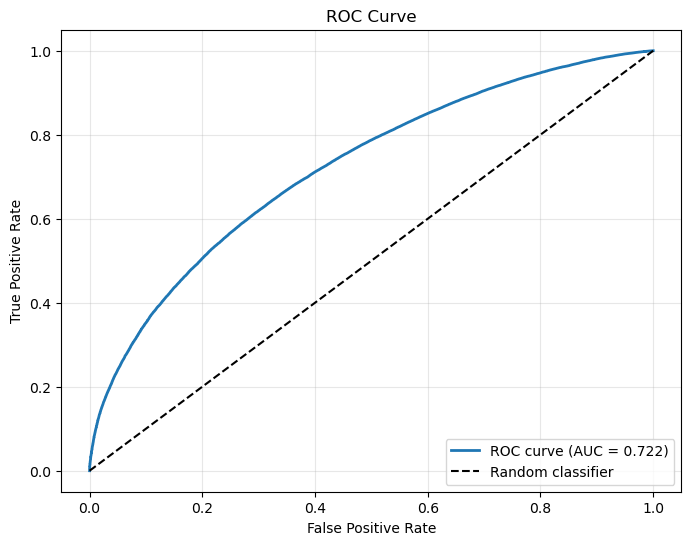

In [29]:
# 11. График ROC-кривой
print("\n10. ROC-кривая...")
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

In [32]:
# 12. Анализ предсказаний
print("\n11. Анализ предсказаний...")

# Создаем DataFrame с результатами
results_df = X_test.copy()
results_df['actual'] = y_test.values
results_df['predicted'] = y_pred
results_df['probability'] = y_pred_proba
results_df['correct'] = results_df['actual'] == results_df['predicted']

# Примеры правильных и неправильных предсказаний
correct_predictions = results_df[results_df['correct'] == True]
incorrect_predictions = results_df[results_df['correct'] == False]

print(f"Количество правильных предсказаний: {len(correct_predictions)}")
print(f"Количество неправильных предсказаний: {len(incorrect_predictions)}")

if len(incorrect_predictions) > 0:
    print("\nПримеры неправильных предсказаний:")
    print(incorrect_predictions[['actual', 'predicted', 'probability']].head())



11. Анализ предсказаний...
Количество правильных предсказаний: 91194
Количество неправильных предсказаний: 48806

Примеры неправильных предсказаний:
        actual  predicted  probability
336809     1.0        0.0     0.416093
209303     0.0        1.0     0.506125
200046     1.0        0.0     0.370251
669206     1.0        0.0     0.377229
132699     1.0        0.0     0.480195



12. Распределение вероятностей...


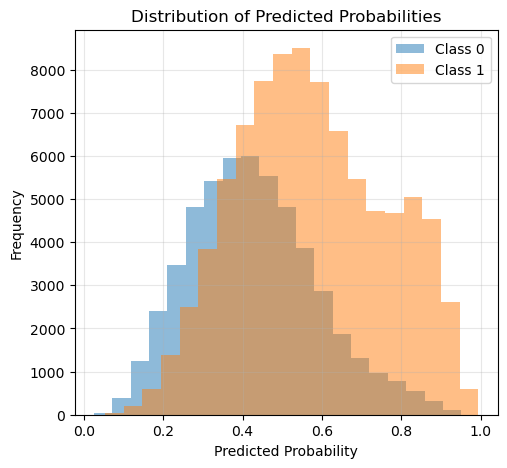

In [33]:
# 13. Анализ вероятностей
print("\n12. Распределение вероятностей...")

plt.figure(figsize=(12, 5))

# Гистограмма вероятностей для разных классов
plt.subplot(1, 2, 1)
plt.hist(results_df[results_df['actual'] == 0]['probability'], 
         alpha=0.5, label='Class 0', bins=20)
plt.hist(results_df[results_df['actual'] == 1]['probability'], 
         alpha=0.5, label='Class 1', bins=20)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.legend()
plt.grid(True, alpha=0.3)

/tmp/ipykernel_11007/3921315031.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['Class 0', 'Class 1'])


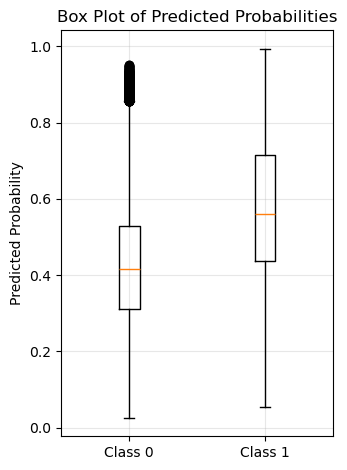

In [34]:
# Box plot вероятностей
plt.subplot(1, 2, 2)
data_to_plot = [results_df[results_df['actual'] == 0]['probability'],
                results_df[results_df['actual'] == 1]['probability']]
plt.boxplot(data_to_plot, labels=['Class 0', 'Class 1'])
plt.ylabel('Predicted Probability')
plt.title('Box Plot of Predicted Probabilities')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [35]:
# 14. Сохранение модели
print("\n13. Сохранение модели...")
model.save_model('catboost_diabetes_model.cbm')
print("Модель сохранена как 'catboost_diabetes_model.cbm'")


13. Сохранение модели...
Модель сохранена как 'catboost_diabetes_model.cbm'


In [37]:
# 15. Функция для предсказания на новых данных
print("\n14. Создание функции для предсказания...")

def predict_diabetes_risk(new_data):
    """
    Предсказывает риск диабета для новых данных
    
    Parameters:
    new_data (DataFrame или dict): Новые данные для предсказания
    
    Returns:
    dict: Результаты предсказания
    """
    # Преобразуем в DataFrame если нужно
    if isinstance(new_data, dict):
        new_data = pd.DataFrame([new_data])
    
    # Удаляем ID если есть
    if 'id' in new_data.columns:
        new_data = new_data.drop('id', axis=1)
    
    # Делаем предсказания
    probability = model.predict_proba(new_data)[0, 1]
    prediction = model.predict(new_data)[0]
    
    return {
        'probability': float(probability),
        'prediction': int(prediction),
        'risk_level': 'High' if probability > 0.7 else ('Medium' if probability > 0.3 else 'Low')
    }


# Пример использования функции
print("\nПример использования функции predict_diabetes_risk():")
sample_data = X_test.iloc[0:1].copy()
result = predict_diabetes_risk(sample_data)
print(f"Предсказание: {result}")


14. Создание функции для предсказания...

Пример использования функции predict_diabetes_risk():
Предсказание: {'probability': 0.4160930813229357, 'prediction': 0, 'risk_level': 'Medium'}


In [38]:
# 16. Сводка результатов
print("\n" + "="*50)
print("СВОДКА РЕЗУЛЬТАТОВ")
print("="*50)
print(f"1. Качество модели на тестовой выборке:")
print(f"   - Accuracy: {accuracy:.4f}")
print(f"   - F1-Score: {f1:.4f}")
print(f"   - ROC-AUC:  {roc_auc:.4f}")

print(f"\n2. Топ-5 важных признаков:")
for i, row in feature_importance_df.head(5).iterrows():
    print(f"   {i+1}. {row['feature']}: {row['importance']:.4f}")

print(f"\n3. Размеры данных:")
print(f"   - Train: {X_train.shape[0]} samples")
print(f"   - Val:   {X_val.shape[0]} samples")
print(f"   - Test:  {X_test.shape[0]} samples")

print(f"\n4. Баланс классов в train:")
print(f"   - Class 0: {(y_train == 0).sum()} ({(y_train == 0).mean()*100:.1f}%)")
print(f"   - Class 1: {(y_train == 1).sum()} ({(y_train == 1).mean()*100:.1f}%)")

print("\n" + "="*50)
print("Готово!")


СВОДКА РЕЗУЛЬТАТОВ
1. Качество модели на тестовой выборке:
   - Accuracy: 0.6514
   - F1-Score: 0.6914
   - ROC-AUC:  0.7223

2. Топ-5 важных признаков:
   3. physical_activity_minutes_per_week: 33.2810
   22. family_history_diabetes: 30.3247
   1. age: 10.8760
   15. triglycerides: 6.5586
   7. bmi: 3.4921

3. Размеры данных:
   - Train: 420000 samples
   - Val:   140000 samples
   - Test:  140000 samples

4. Баланс классов в train:
   - Class 0: 158216 (37.7%)
   - Class 1: 261784 (62.3%)

Готово!
